In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset.csv')
df.describe()

,Matrix,Eigenvalues
count,30,30
unique,30,30
top,"[[63, 35], [35, 94]]","[40.22141590915359, 116.77858409084641]"
freq,1,1


In [4]:
df['Eigenvalues'] = df['Eigenvalues'].apply(eval)

In [5]:
eigenvalues_df = pd.DataFrame(df['Eigenvalues'].tolist())
eigenvalues_df.describe()

,0,1,2,3
count,30.000000,30.000000,20.000000,10.000000
mean,137.907311,17.526897,15.322880,12.151614
std,80.592931,58.984243,47.486160,36.913950
min,-21.281445,-61.568154,-35.484513,-38.355941
25%,116.243156,-28.074322,-12.284435,-15.377612
50%,157.068443,-0.689656,-2.466291,-0.349804
75%,196.412895,57.292222,39.191312,49.050435
max,242.572938,117.675697,166.296575,61.334563


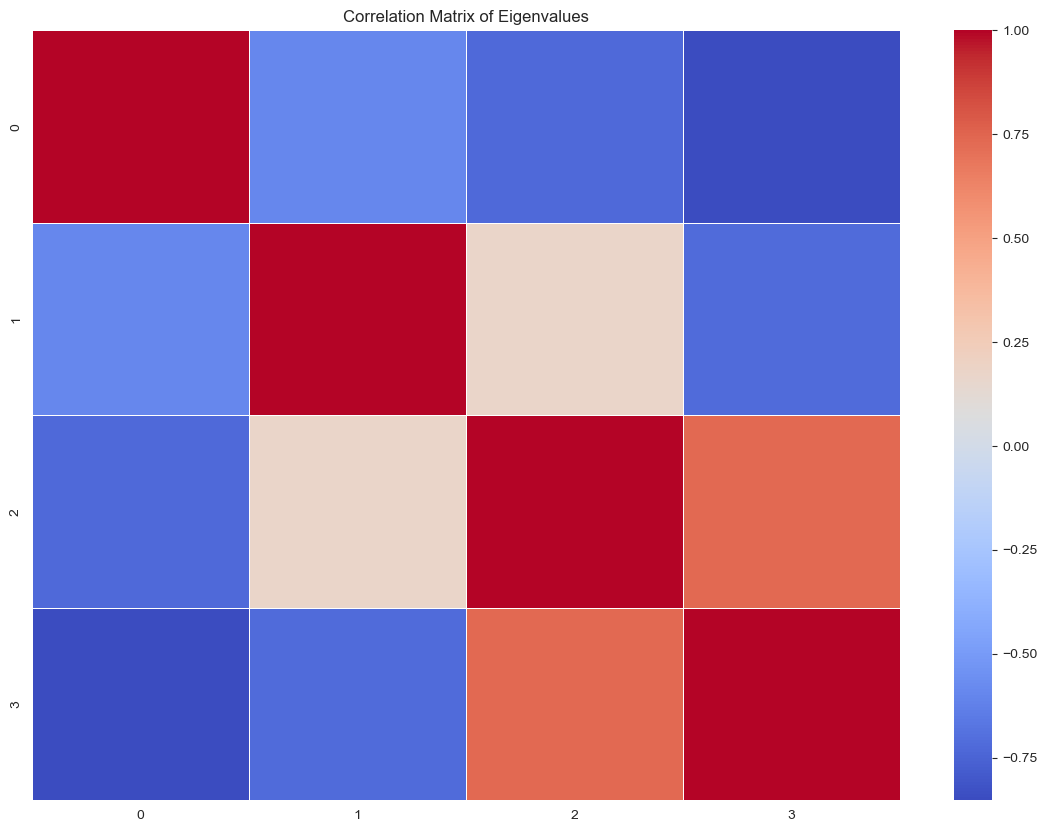

In [6]:
correlation_matrix = eigenvalues_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Eigenvalues')
plt.show()

In [7]:
from sklearn.decomposition import PCA

# Handle NaN values by filling them with the mean of the column
eigenvalues_df = eigenvalues_df.fillna(eigenvalues_df.mean())

# Perform PCA on the eigenvalues
pca = PCA(n_components=2)
principal_components = pca.fit_transform(eigenvalues_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df.describe()

,PC1,PC2
count,3.000000e+01,3.000000e+01
mean,-2.131628e-14,-6.868580e-15
std,9.181719e+01,4.689672e+01
min,-1.936658e+02,-7.807266e+01
25%,-2.779426e+01,-3.344842e+01
50%,3.911028e+01,-1.834727e+01
75%,6.241182e+01,2.627675e+01
max,1.000232e+02,1.002711e+02


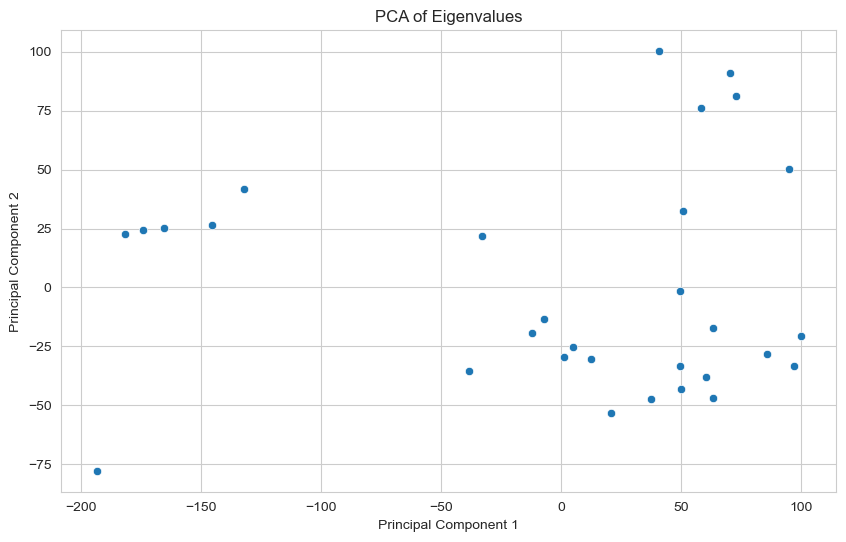

In [8]:
# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Eigenvalues')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\eserize\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


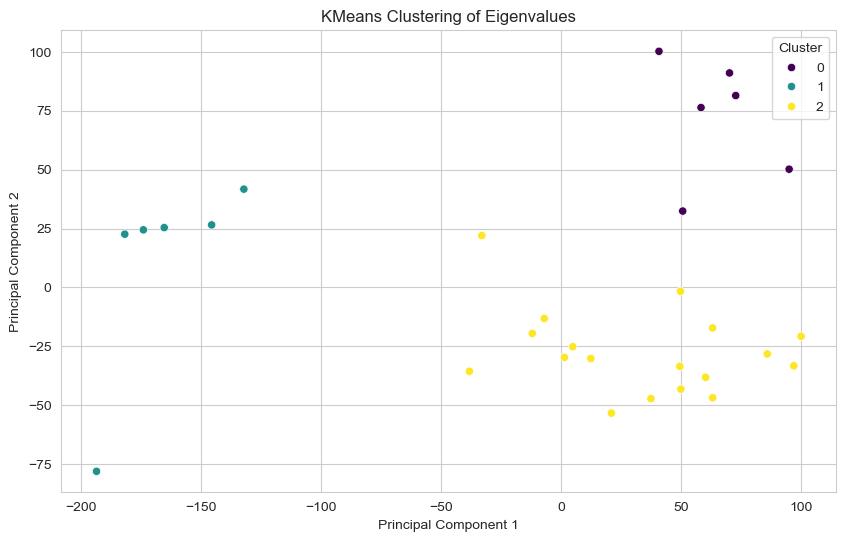

In [9]:
from sklearn.cluster import KMeans

# Perform KMeans clustering on the eigenvalues
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(eigenvalues_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clustering of Eigenvalues')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()